# CAICT 風機結冰預測 - Data Exploration 
YAW

** second key factor **
** 2017/08/09 **   

http://www.industrial-bigdata.com/competition/competitionAction!showDetail.action?competition.competitionId=1

In [1]:
from IPython.display import HTML
HTML('''<script>
presentation = 0;
code_show=true; 
function code_toggle() {
 if (!presentation){
     return;
 }
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<a id='home'></a>
### Outline
[1. Modules](#load)  
[2. Input Data](#input)  
[3. Single Variable Exploration](#single)    
[4. Multi-Variable Exploration](#multi)
[5. dimension reduction](#dimen)

In [2]:
%matplotlib inline
import sys
import os
import datetime
import pandas as pd
import numpy as np
import lzma
import pickle
import shutil
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats
import pylab
from pylab import *
import plastid

from collections import OrderedDict
from PIL import Image

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
from IPython.display import HTML

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn import preprocessing

import sklearn
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "none"

# ‘all’|’last’|’last_expr’|’none’

/Users/jayhsu/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
def StandardScaler(data):
    standard_scaler = preprocessing.StandardScaler()
    data_scaled = standard_scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
    return data_scaled

def MinMaxScaler(data):
    standard_scaler = preprocessing.MinMaxScaler()
    data_scaled = standard_scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
    return data_scaled


def load_resample_data(mid, policy=1,  ycol='power'):
    filename = 'data/resample_data_p{POLICY}_{ID}.csv'.format(ID=mid,POLICY=policy)
    print('load file:',filename)
    data_resample = pd.read_csv(filename)
    data_resample['label']=data_resample['label'].fillna(2)

    data_X = data_resample.drop(['label','time','group','timestamp','event'], axis=1)
    data_y = data_resample[ycol]
    data_Y = np.eye(data_y.unique().size)[data_y.values.astype(int)]
    return data_resample, data_X, data_Y, data_y


def load_expo_data(mid=15,policy=0):
    non_data_cols = ['label','time','group','timestamp','event']
    data_raw, data_X, _, _ = load_resample_data(mid=mid,policy=policy)
    data_scaled = MinMaxScaler(data_X)
    for col in non_data_cols:
        data_scaled[col] = data_raw[col]
    return data_raw,data_scaled


In [4]:
def checkPath(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc: 
            if exc.errno != errno.EEXIST:
                raise

<a id='input'></a>
** Input Data **  
data resample policy
- 15號風機
- remove 無效數據
- 沒有做resampling

In [5]:
_, dat_scaled_M15 = load_expo_data(mid=15,policy=0)
#_, dat_scaled_M15 = load_expo_data(mid=15,policy=4)

#dat_scaled_M15_Complete, _ = add_feature_windspeed(dat_scaled_M15_Complete)
#dat_scaled_M15, _ = add_feature_windspeed(dat_scaled_M15)


load file: data/resample_data_p0_15.csv


** Exploration **
- Training Data: data_scaled_M15
  - M15
  - scaled
  - resample policy: 0 
  - pass data only
- Prediction Data: data_scaled_M15
  - M15
  - scaled
  - resample policy: 0
- model
  - all x
  - xgboost 
  


In [6]:
data_pass= dat_scaled_M15[dat_scaled_M15['label']==0]
data_fail= dat_scaled_M15[dat_scaled_M15['label']==1]
data_unknown= dat_scaled_M15[dat_scaled_M15['label']==2]


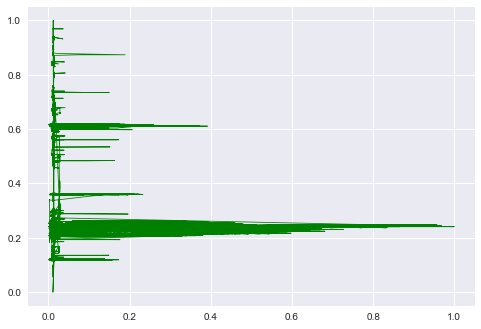

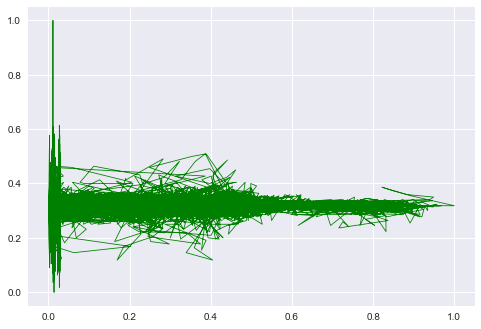

In [25]:
plt.plot(dat_scaled_M15['pitch1_angle'], dat_scaled_M15['yaw_position'],color='green', lw=0.8, label='pitch1_angle')
plt.show()
plt.plot(dat_scaled_M15['pitch1_angle'], dat_scaled_M15['yaw_speed'],color='green', lw=0.8, label='pitch1_angle')


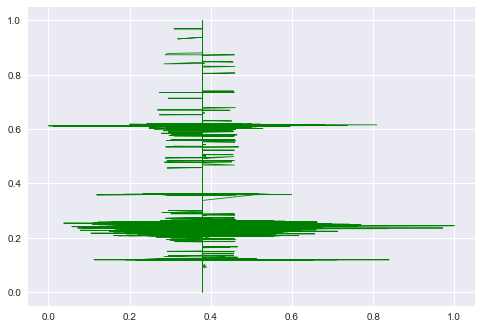

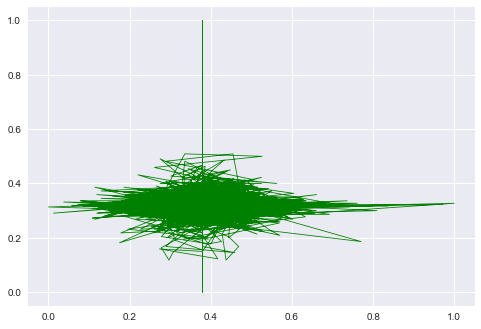

In [26]:
plt.plot(dat_scaled_M15['pitch1_speed'], dat_scaled_M15['yaw_position'],color='green', lw=0.8, label='pitch1_angle')
plt.show()
plt.plot(dat_scaled_M15['pitch1_speed'], dat_scaled_M15['yaw_speed'],color='green', lw=0.8, label='pitch1_angle')


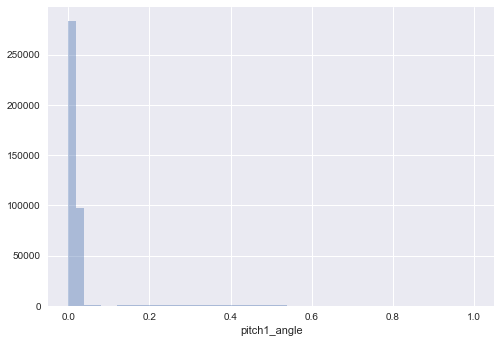

In [29]:
sns.distplot(dat_scaled_M15['pitch1_angle'], kde=False)

In [32]:
display(dat_scaled_M15['pitch1_angle'].value_counts())

0.012302    53915
0.013620    51272
0.024605    44257
0.012742    42420
0.014060    38764
0.010984    17998
0.016257    17883
0.026801    15662
0.011424    13087
0.002197    11847
0.025483     9336
0.027680     7245
0.027241     6241
0.028120     6063
0.008348     5969
0.010105     5879
0.008787     5815
0.009666     5227
0.015817     4062
0.025923     2531
0.024165     1899
0.025044     1852
0.014499     1308
0.014938     1178
0.005712      908
0.016696      857
0.017575      819
0.005272      701
0.018453      582
0.017135      581
            ...  
0.854569        1
0.908612        1
0.974956        1
0.786028        1
0.668717        1
0.934534        1
0.750000        1
0.751318        1
0.762742        1
0.911248        1
0.844464        1
0.710018        1
0.832162        1
0.889279        1
0.846221        1
0.858524        1
0.993849        1
0.742970        1
0.616432        1
0.963533        1
0.718366        1
0.884886        1
0.827768        1
0.585677        1
0.706063  

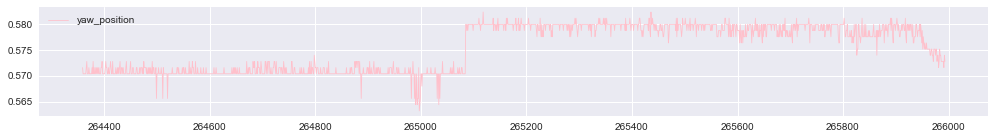

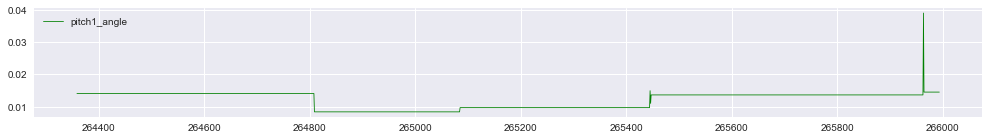

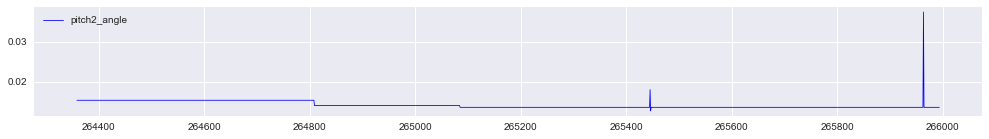

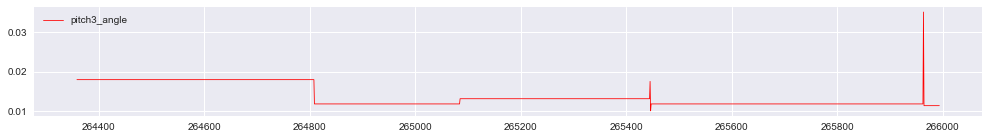

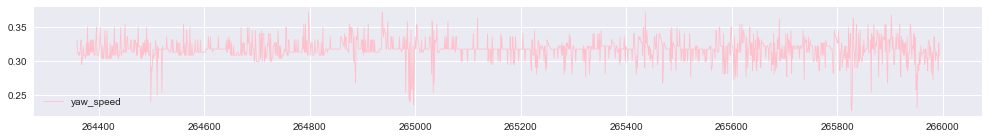

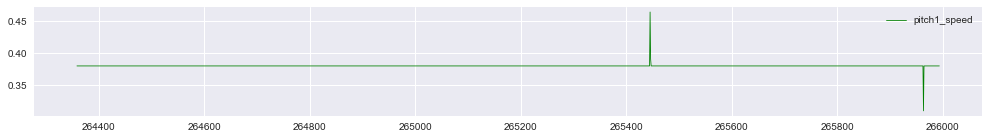

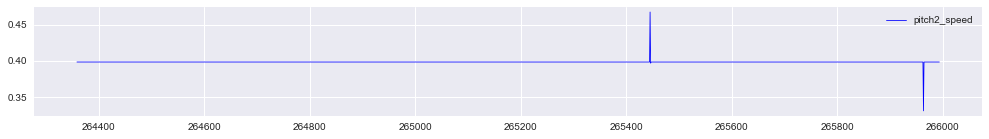

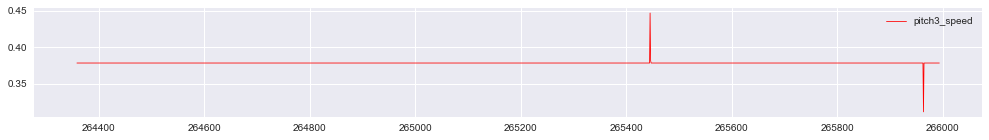

In [38]:
data = dat_scaled_M15[dat_scaled_M15['event']==17]

dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_position'], color='pink', lw=0.8, label='yaw_position')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_angle'], color='green', lw=0.8, label='pitch1_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_angle'], color='blue', lw=0.8, label='pitch2_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_angle'], color='red', lw=0.8, label='pitch3_angle')
plt.legend()
plt.show()

dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_speed'], color='pink', lw=0.8, label='yaw_speed')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_speed'], color='green', lw=0.8, label='pitch1_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_speed'], color='blue', lw=0.8, label='pitch2_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_speed'], color='red', lw=0.8, label='pitch3_speed')
plt.legend()
plt.show()

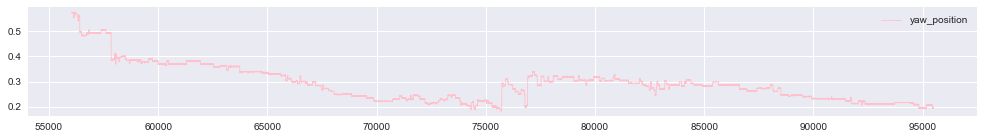

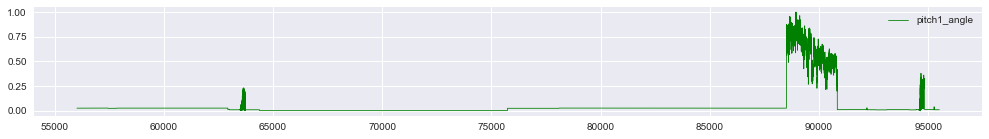

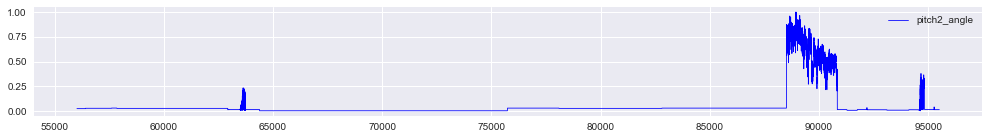

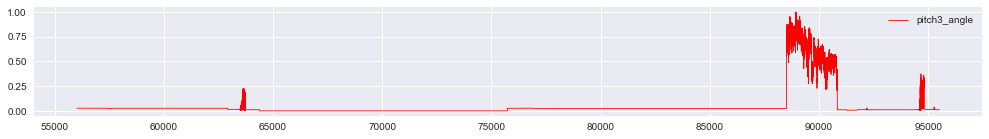

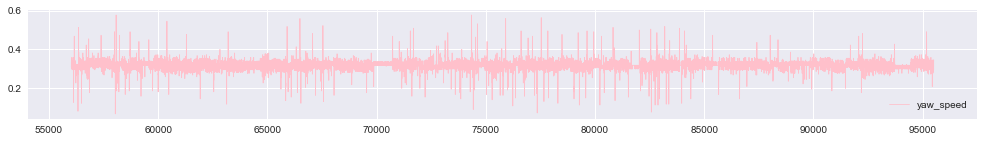

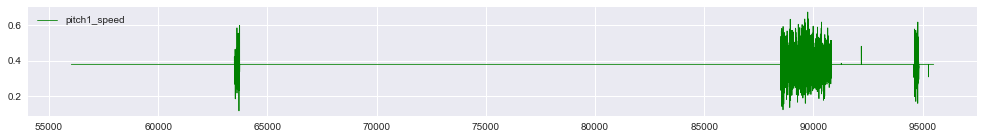

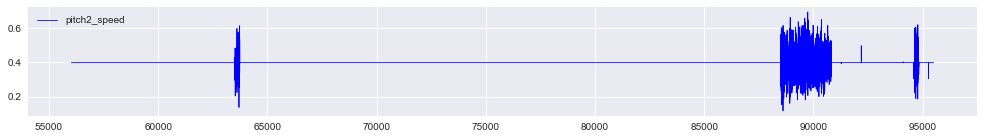

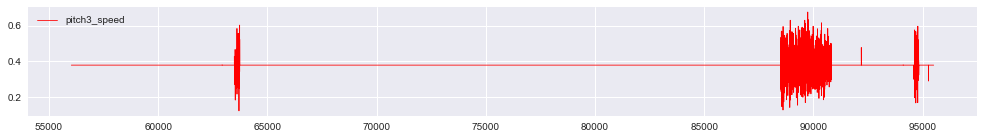

In [35]:
data = data_pass[data_pass['event']==3]

dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_position'], color='pink', lw=0.8, label='yaw_position')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_angle'], color='green', lw=0.8, label='pitch1_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_angle'], color='blue', lw=0.8, label='pitch2_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_angle'], color='red', lw=0.8, label='pitch3_angle')
plt.legend()
plt.show()


dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_speed'], color='pink', lw=0.8, label='yaw_speed')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_speed'], color='green', lw=0.8, label='pitch1_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_speed'], color='blue', lw=0.8, label='pitch2_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_speed'], color='red', lw=0.8, label='pitch3_speed')
plt.legend()
plt.show()

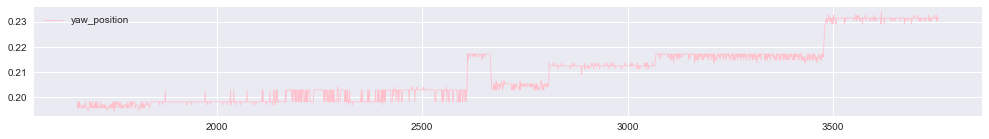

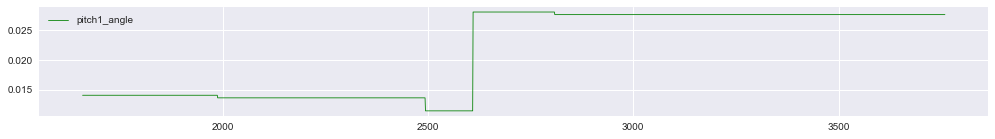

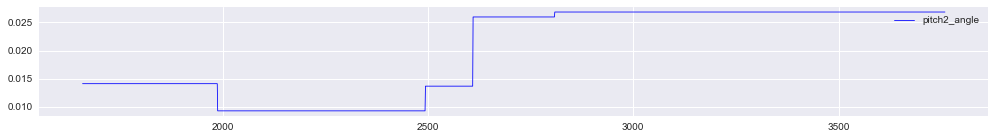

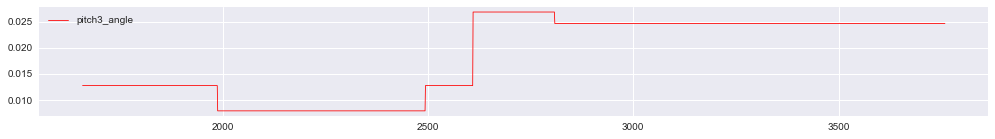

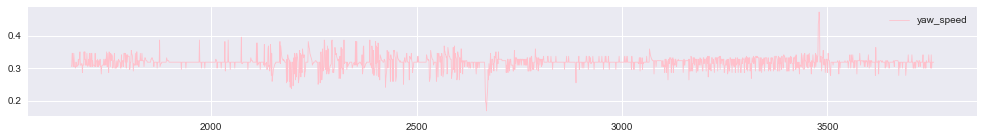

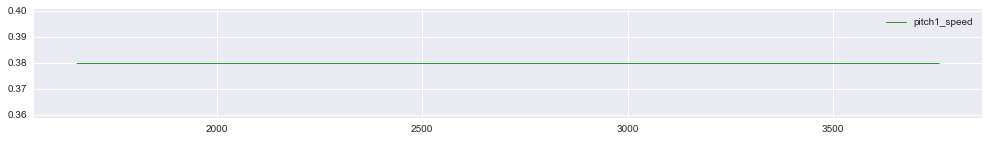

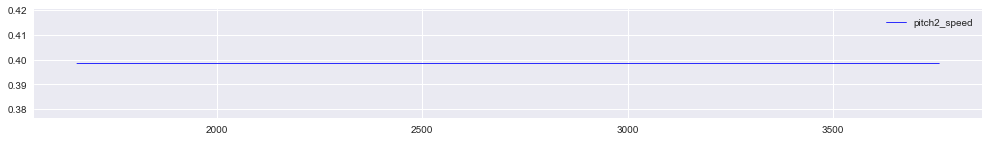

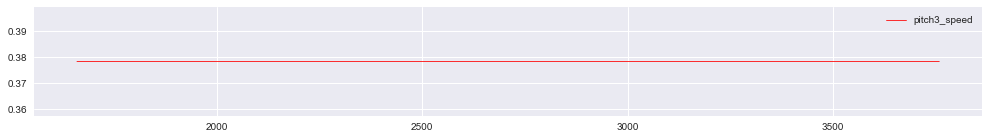

In [34]:
data = data_fail[data_fail['event']==3]

dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_position'], color='pink', lw=0.8, label='yaw_position')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_angle'], color='green', lw=0.8, label='pitch1_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_angle'], color='blue', lw=0.8, label='pitch2_angle')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_angle'], color='red', lw=0.8, label='pitch3_angle')
plt.legend()
plt.show()

dummy = plt.figure(figsize=[17,2])
plt.plot(data['yaw_speed'], color='pink', lw=0.8, label='yaw_speed')
plt.legend()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch1_speed'], color='green', lw=0.8, label='pitch1_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch2_speed'], color='blue', lw=0.8, label='pitch2_speed')
plt.legend()
plt.show()
dummy = plt.figure(figsize=[17,2])
plt.plot(data['pitch3_speed'], color='red', lw=0.8, label='pitch3_speed')
plt.legend()
plt.show()

** 3. by event check the bias **

![](img/named_colors.png)